In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [3]:
def initialize_centroids(X, k):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]
    return centroids

In [4]:
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

In [5]:
def update_centroids(X, clusters, k):
    centroids = []
    for cluster in range(k):
        cluster_points = X[clusters == cluster]
        if len(cluster_points) > 0:
            centroid = np.mean(cluster_points, axis=0)
            centroids.append(centroid)
    return np.array(centroids)

In [6]:
#the total within-cluster sum of squares
def calculate_wcss(X, centroids, clusters):
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[clusters == i]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

In [7]:

def kmeans_elbow(X, k_values, max_iterations=100):
    wcss_values = []
    for k in k_values:
        centroids = initialize_centroids(X, k)
        for _ in range(max_iterations):
            clusters = assign_clusters(X, centroids)
            centroids = update_centroids(X, clusters, k)
        wcss = calculate_wcss(X, centroids, clusters)
        wcss_values.append(wcss)
    return wcss_values


In [28]:
df=pd.read_csv("HeightWeight.csv")
wt=df['Weight(Pounds)']
ht=df['Height(Inches)']
data=np.column_stack((wt,ht))

[3489683.2605290203, 1320884.2517942702, 727055.4886346287, 473349.7833555724, 343621.90921994357, 267423.3941330099, 218007.4676540101, 186341.86857197856, 163368.97545601963, 146256.84976289855]


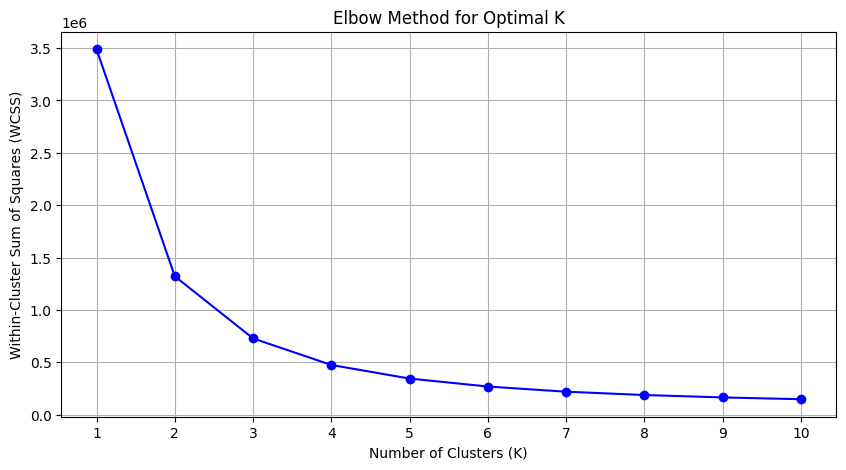

In [19]:
k_values = range(1, 11)

wcss_values = kmeans_elbow(data, k_values)
print(wcss_values)
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


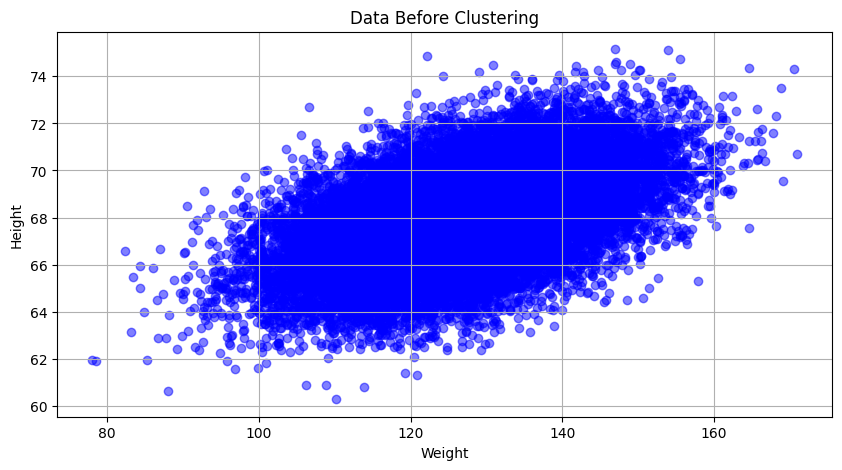

In [20]:
optimal_k = 2  


centroids = initialize_centroids(data, optimal_k)
for _ in range(100): 
    clusters = assign_clusters(data, centroids)
    centroids = update_centroids(data, clusters, optimal_k)


plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5)
plt.title('Data Before Clustering')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.show()




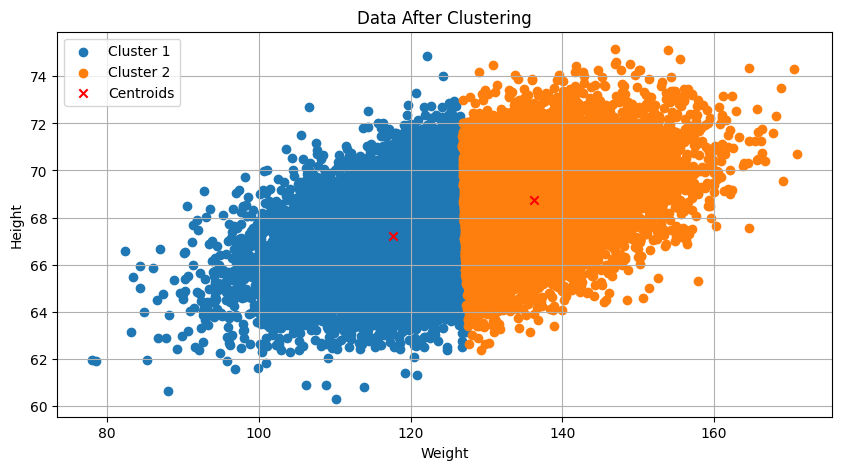

In [21]:
# data after clustering
plt.figure(figsize=(10, 5))
for i in range(optimal_k):
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', label='Centroids')
plt.title('Data After Clustering')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
print("Final centroids:")
print(centroids)
print("Final clusters:")
print(clusters)

Final centroids:
[[117.72655096  67.2156129 ]
 [136.29120003  68.75888542]]
Final clusters:
[0 1 1 ... 0 1 0]


In [27]:

df=pd.read_csv("HeightWeight.csv")
wt=df['Weight(Pounds)'][:500]
ht=df['Height(Inches)'][:500]
data=np.column_stack((wt,ht))

[72482.02672376034, 28498.07684929006, 15497.732292073651, 10565.823126839976, 7420.209742744097, 5910.676017944601, 4729.128563350427, 4197.62967698418, 3443.2408666561214, 3174.040838109793]


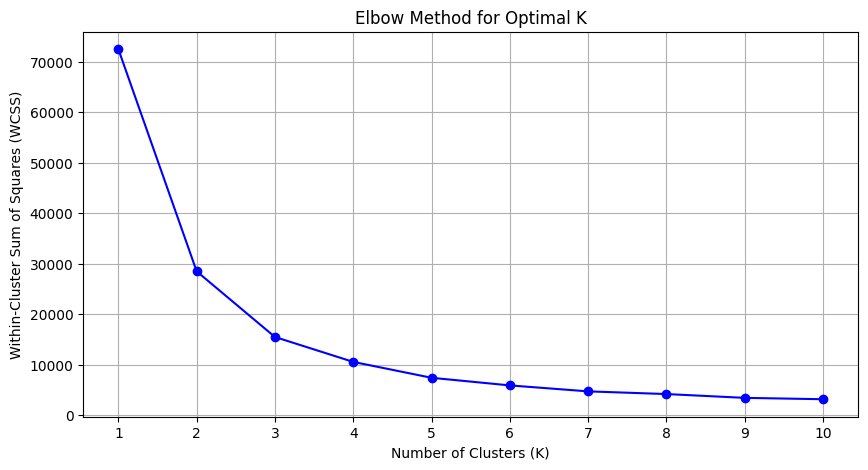

In [24]:
k_values = range(1, 11)

wcss_values = kmeans_elbow(data, k_values)
print(wcss_values)
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


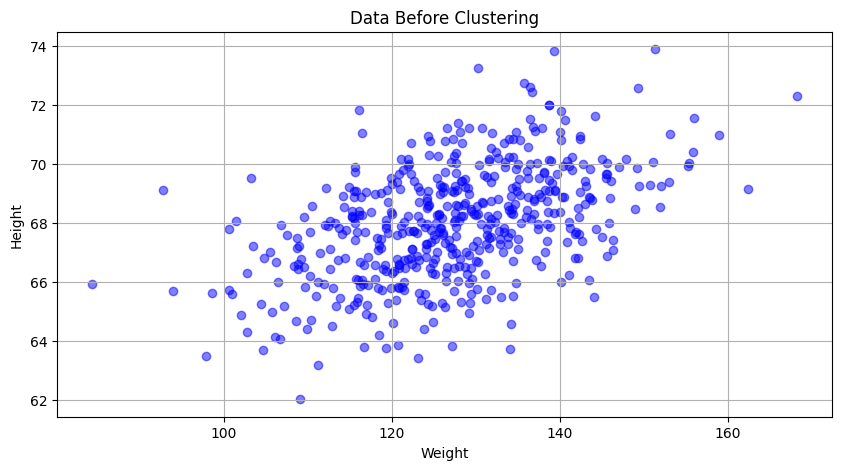

In [25]:
optimal_k = 3 


centroids = initialize_centroids(data, optimal_k)
for _ in range(100): 
    clusters = assign_clusters(data, centroids)
    centroids = update_centroids(data, clusters, optimal_k)


plt.figure(figsize=(10, 5))
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.5)
plt.title('Data Before Clustering')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.show()




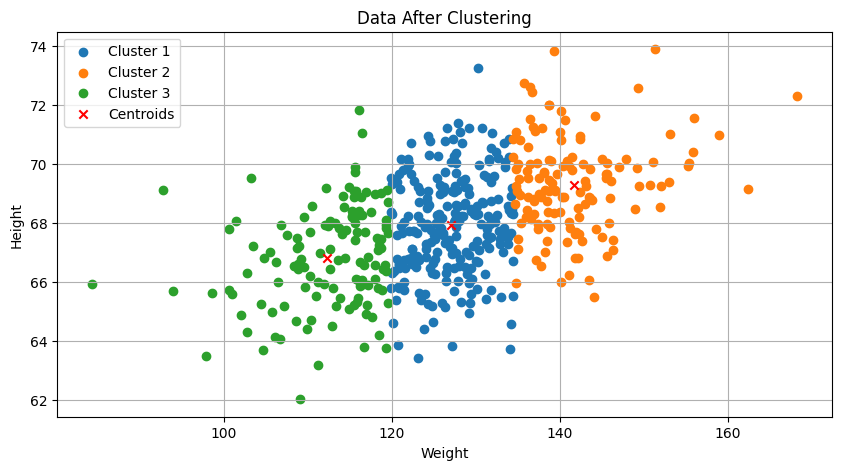

In [26]:
# data after clustering
plt.figure(figsize=(10, 5))
for i in range(optimal_k):
    cluster_points = data[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', label='Centroids')
plt.title('Data After Clustering')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()
plt.grid(True)
plt.show()